<a href="https://colab.research.google.com/github/utkarshg1/Neural-Net-Datasets/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Classification Project

### Load handwritten digit MNIST dataset

In [1]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [2]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
xtrain.shape

(60000, 28, 28)

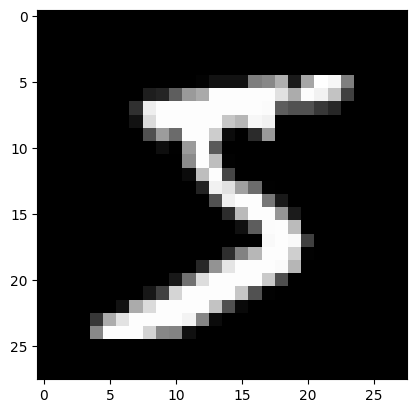

In [4]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')
plt.show()

In [5]:
ytrain[0]

5

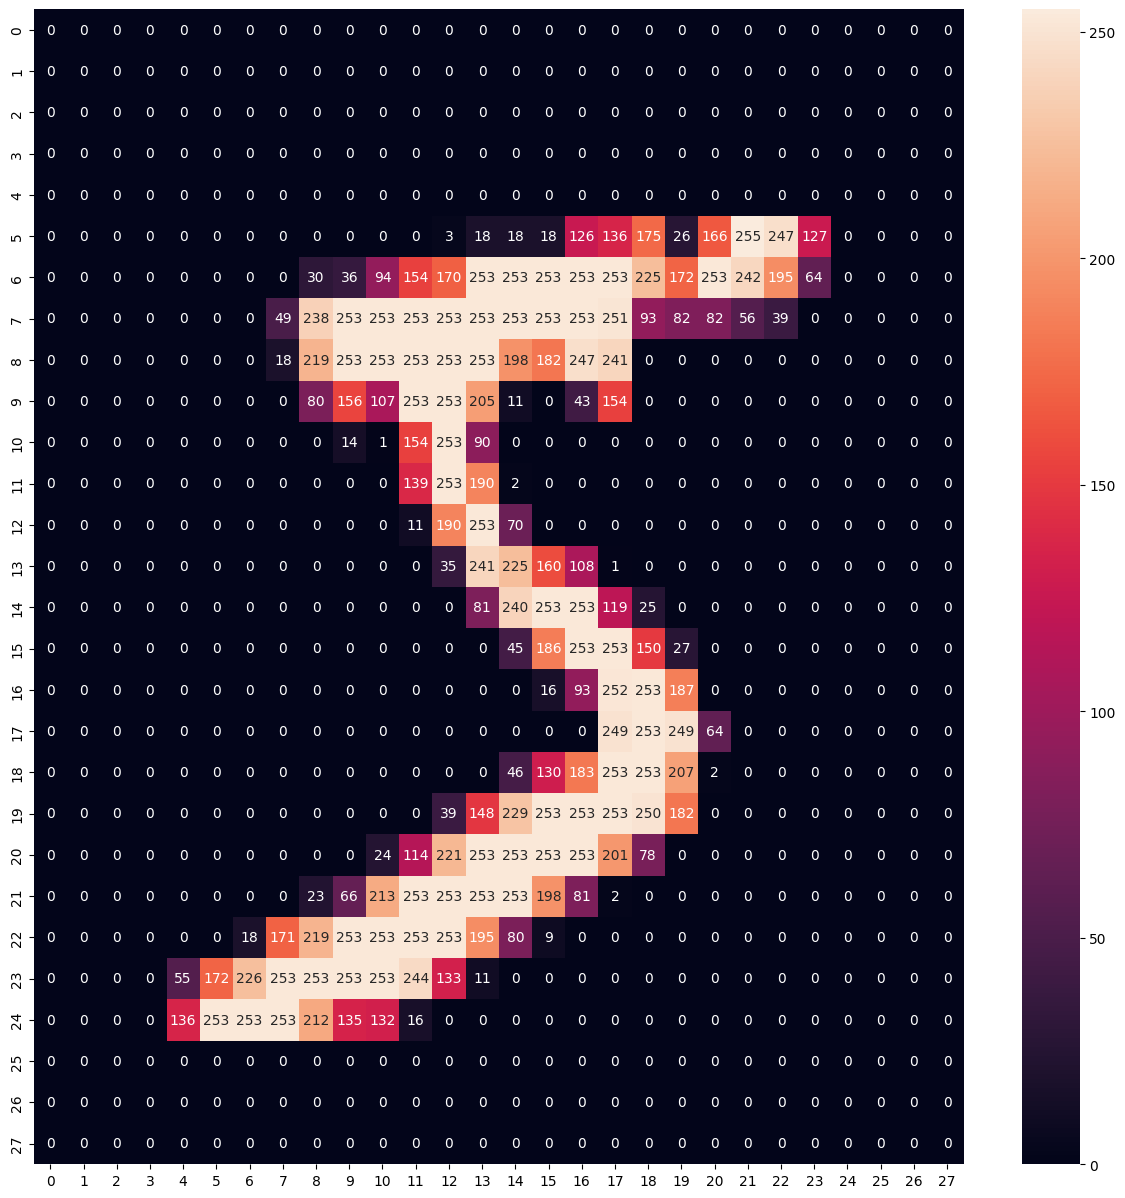

In [6]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(xtrain[0], annot=True, fmt='d')
plt.show()

### View top 9 images from train data

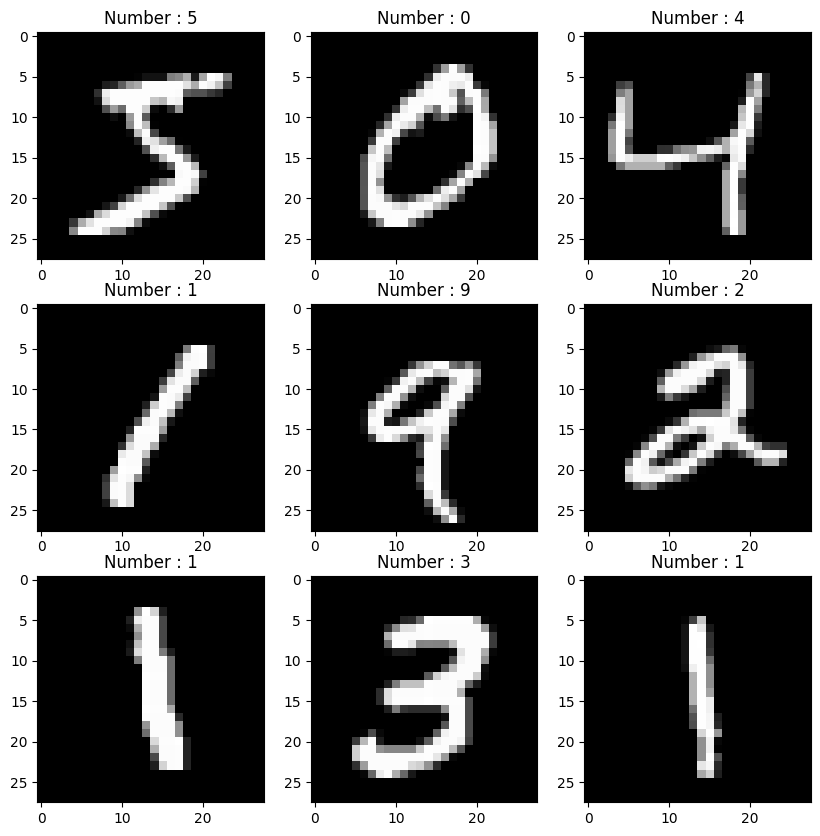

In [7]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtrain[i], cmap='gray')
  plt.title(f'Number : {ytrain[i]}')

In [8]:
xtrain.shape

(60000, 28, 28)

In [9]:
xtest.shape

(10000, 28, 28)

### Preprocessing Data for X
pixel values are between 0-255
so divide xtrain and xtest by 255

In [10]:
xtrain_scl = xtrain.astype('float32')/255
xtest_scl = xtest.astype('float32')/255

In [11]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### For Multiclass classification only Apply One Hot encoding on Y features

In [13]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [14]:
ytrain[0:3]

array([5, 0, 4], dtype=uint8)

In [15]:
ytrain_cat[0:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
ytest[0:3]

array([7, 2, 1], dtype=uint8)

In [17]:
ytest_cat[0:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Build the CNN (Convolutional Neural Network)
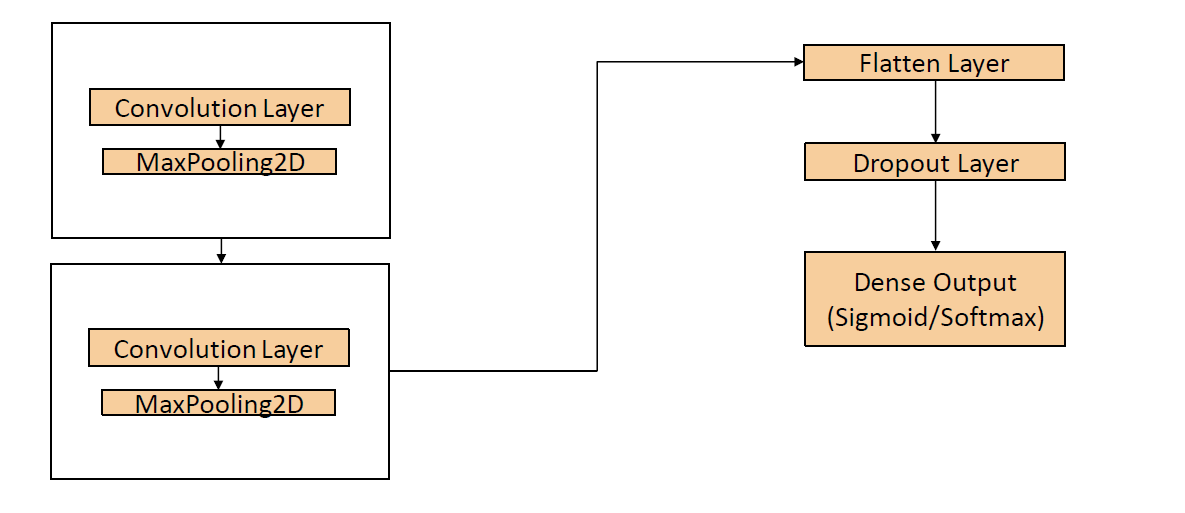

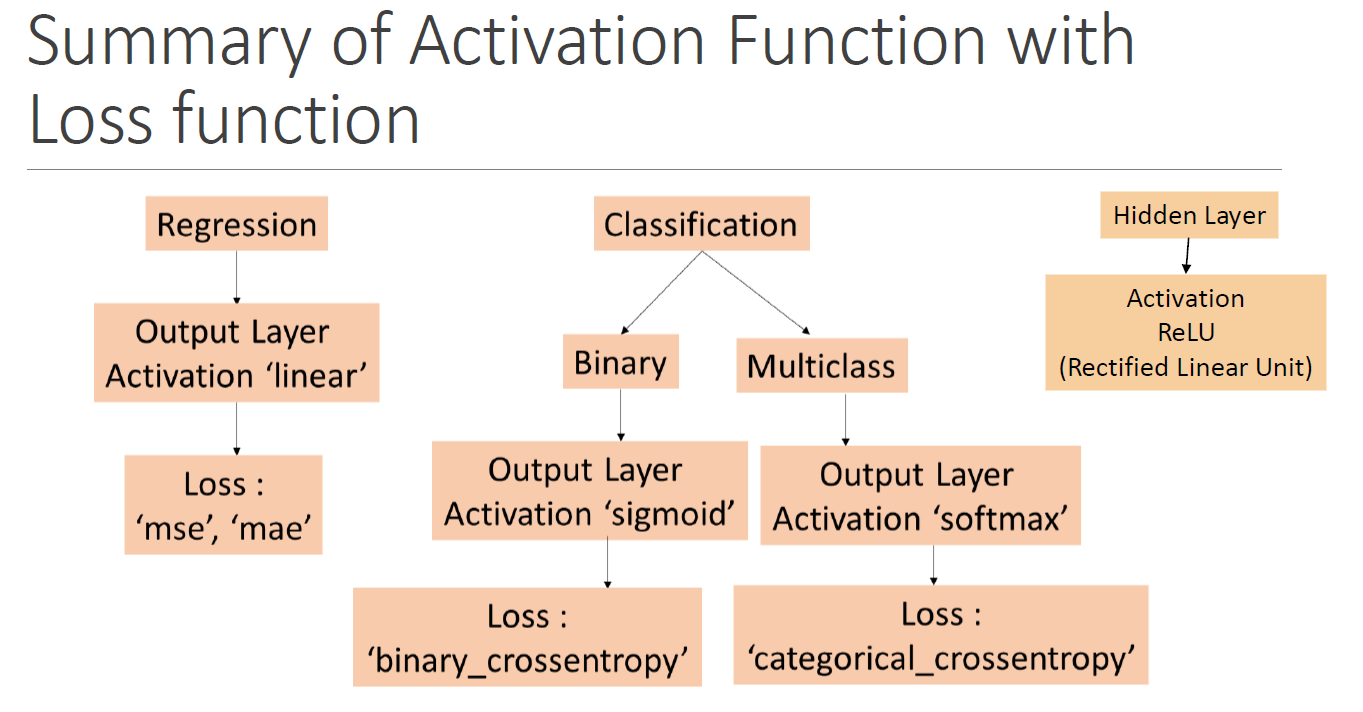

In [18]:
xtrain.shape

(60000, 28, 28)

In [19]:
ytrain_cat.shape[1]

10

In [20]:
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPool2D, Flatten, Dropout, Dense

In [21]:
# Initialize the model
model = Sequential()

# Add the Input layer
model.add(Input(shape=(28, 28, 1)))

# Add Convolutoion layer 1
model.add(Convolution2D(filters=32, activation='relu', kernel_size=(3,3)))

# Add Max Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Add Convoluton layer 2
model.add(Convolution2D(filters=64, activation='relu', kernel_size=(3,3)))

# Add Max Pooling Layer 2
model.add(MaxPool2D(pool_size=(2,2)))

# Add a flatten Layer
model.add(Flatten())

# Add a dropout layer
model.add(Dropout(0.5))

# Create a output layer
model.add(Dense(units=ytrain_cat.shape[1], activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

### Compile and fit the model

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
hist = model.fit(xtrain, ytrain_cat, validation_split=0.1, epochs=15)

Epoch 1/15
1688/1688 [==============================] - 19s 6ms/step - loss: 0.5914 - accuracy: 0.8961 - val_loss: 0.0713 - val_accuracy: 0.9800
Epoch 2/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1371 - accuracy: 0.9584 - val_loss: 0.0603 - val_accuracy: 0.9815
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1053 - accuracy: 0.9680 - val_loss: 0.0455 - val_accuracy: 0.9868
Epoch 4/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0968 - accuracy: 0.9701 - val_loss: 0.0480 - val_accuracy: 0.9857
Epoch 5/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0884 - accuracy: 0.9730 - val_loss: 0.0354 - val_accuracy: 0.9907
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0800 - accuracy: 0.9758 - val_loss: 0.0445 - val_accuracy: 0.9885
Epoch 7/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0801 - accuracy: 0.9761 - val_loss: 0.0355 - val_accuracy

### Plot the learning curve

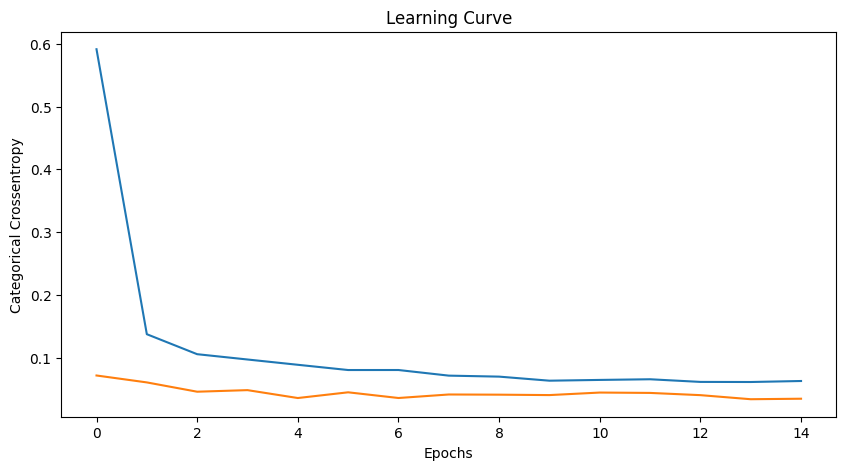

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve')
plt.show()

### Evaluate model on train and test

In [27]:
model.evaluate(xtrain, ytrain_cat)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0172 - accuracy: 0.9944


[0.017173252999782562, 0.9944333434104919]

In [28]:
model.evaluate(xtest, ytest_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.0361 - accuracy: 0.9893


[0.03607301786541939, 0.989300012588501]

### Predict probability for train and test

In [29]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [30]:
yprob_train[0:5]

array([[1.90478406e-12, 4.67283157e-11, 4.62853263e-11, 1.69313844e-05,
        3.64209016e-13, 9.99980807e-01, 2.00827603e-08, 4.78193207e-10,
        2.24627956e-06, 1.75528836e-08],
       [9.99998569e-01, 2.45433599e-15, 1.28664169e-06, 1.01848955e-11,
        2.93071262e-11, 1.00339763e-11, 2.65762767e-09, 1.17702636e-11,
        1.28116096e-08, 4.74462709e-08],
       [1.27729533e-12, 2.17654201e-06, 5.45640333e-09, 3.89133170e-11,
        9.99988556e-01, 3.59679148e-12, 3.07216980e-13, 4.81452298e-06,
        2.92037394e-09, 4.48853643e-06],
       [4.57420019e-10, 9.99980688e-01, 1.14860036e-07, 4.47765349e-12,
        1.18136927e-06, 1.47690998e-10, 5.30987032e-10, 1.24376911e-05,
        5.57840076e-06, 6.38882725e-08],
       [5.73401623e-13, 7.39332137e-11, 1.55548292e-07, 8.01104107e-08,
        4.97936853e-05, 2.16504176e-10, 2.60911262e-15, 6.91490868e-07,
        2.65034505e-05, 9.99922752e-01]], dtype=float32)

In [31]:
yprob_test[0:5]

array([[4.4368856e-10, 4.9603095e-09, 1.0476219e-06, 2.5119596e-06,
        4.4118301e-14, 3.0080163e-10, 1.2484213e-15, 9.9999416e-01,
        3.6240753e-08, 2.2420568e-06],
       [5.6358291e-09, 9.6806108e-10, 1.0000000e+00, 1.7625610e-09,
        7.7572427e-13, 4.7739010e-15, 9.2474099e-09, 2.1459700e-15,
        6.7068844e-09, 2.0991075e-15],
       [6.7127557e-09, 9.9987364e-01, 2.7111371e-06, 8.2378953e-08,
        5.6080416e-06, 2.3542943e-07, 1.8582213e-06, 2.9507692e-06,
        1.1292060e-04, 1.7277449e-08],
       [9.9984372e-01, 2.3574621e-12, 3.4658274e-06, 6.9659312e-10,
        1.9919169e-06, 2.2905731e-08, 1.3597327e-04, 3.3063301e-08,
        7.6605926e-07, 1.3954728e-05],
       [2.2332392e-12, 1.6141247e-10, 2.0255537e-11, 3.2786504e-14,
        1.0000000e+00, 1.4377278e-11, 5.5820761e-11, 5.8462592e-12,
        1.4415426e-10, 1.2172938e-08]], dtype=float32)

### Give the final prediction for train and test

In [32]:
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [33]:
ypred_train

array([5, 0, 4, ..., 5, 6, 8])

In [34]:
ypred_test

array([7, 2, 1, ..., 4, 5, 6])

### Plot the confusion matrix for test

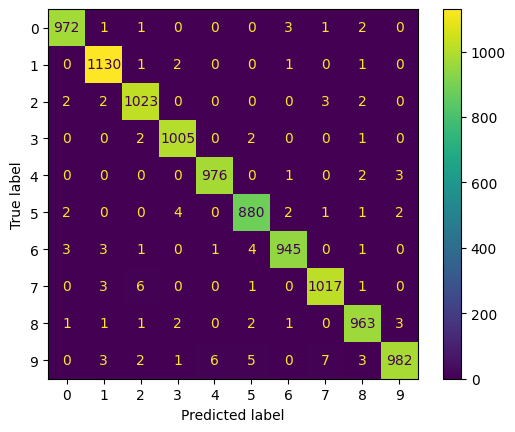

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save the model for future use

In [37]:
model.save('HandwrittenModel.keras')

### Load the model for future use

In [38]:
from keras.models import load_model
m = load_model('/content/HandwrittenModel.keras')
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0